In [1]:
%matplotlib inline

In [12]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [3]:
confirmed = pandas.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths = pandas.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered = pandas.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

population = pandas.read_excel("population.xlsx")

In [4]:
ppl = {country.lstrip(): pop for country, pop in zip(population["Country or area"], population["Population"])}
ppl["Mainland China"] = ppl.pop("China")
ppl["US"] = ppl.pop('United States')
ppl["Iran (Islamic Republic of)"] = ppl.pop('Iran')
ppl["Hong Kong SAR"] = ppl.pop('Hong Kong')
ppl["Taipei and environs"] = ppl.pop('Taiwan')
ppl["UK"] = ppl.pop('United Kingdom')
ppl["Republic of Korea"] = ppl.pop('South Korea')

In [5]:
countries = list(set(list(confirmed["Country/Region"])))
confirmed_dict = dict()
deaths_dict = dict()
recovered_dict = dict()
for country in countries:
    confirmed_dict[country] = confirmed[confirmed["Country/Region"]==country].sum()
    deaths_dict[country] = deaths[deaths["Country/Region"]==country].sum()
    recovered_dict[country] = recovered[recovered["Country/Region"]==country].sum()

In [6]:
# ppl

In [24]:
latest_date = confirmed.columns[-1]
# pandas.options.display.float_format = '{:.3f}'.format
latest = pandas.DataFrame([[country, 
                            confirmed_dict[country][latest_date], 
                            deaths_dict[country][latest_date], 
                            recovered_dict[country][latest_date]] for country in countries], columns=["country", "confirmed", "deaths", "recovered"])
latest["death_rate"] = latest["deaths"]/latest["confirmed"]*100
latest["recovered_rate"] = latest["recovered"]/latest["confirmed"]*100
latest["population"] = [int(ppl[_]) if _ in ppl.keys() else None for _ in latest["country"]]
latest["confirmed_rate"] = latest["confirmed"]/latest["population"]*100 if latest["population"] is not None else None

latest.style.format({'population': "{:.0f}", 
                     'confirmed_rate': '{:.3%}', 
                     'death_rate': '{:.3%}', 
                     'recovered_rate': '{:.3%}'
                    })
# latest.sort_values("deaths", ascending=False)
# latest.sort_values("death_rate", ascending=False)
# latest.sort_values("recovered_rate", ascending=False)
# latest.sort_values("confirmed_rate", ascending=False)

,country,confirmed,deaths,recovered,death_rate,recovered_rate,population,confirmed_rate
0,Austria,182,0,4,0.000%,219.780%,8955102,0.203%
1,Malaysia,129,0,24,0.000%,1860.465%,31949777,0.040%
2,Others,696,6,40,86.207%,574.713%,nan,nan%
3,Estonia,12,0,0,0.000%,0.000%,1325648,0.091%
4,Latvia,8,0,1,0.000%,1250.000%,1906743,0.042%
5,Israel,58,0,4,0.000%,689.655%,8519377,0.068%
6,Serbia,5,0,0,0.000%,0.000%,8772235,0.006%
7,Russian Federation,20,0,3,0.000%,1500.000%,nan,nan%
8,Portugal,41,0,0,0.000%,0.000%,10226187,0.040%
9,Sweden,355,0,1,0.000%,28.169%,10036379,0.354%


Text(0, 0.5, 'New Confirmed')

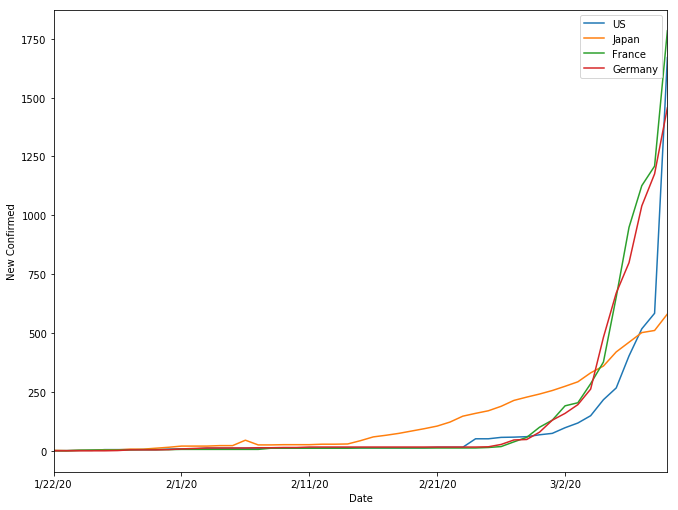

In [5]:
latest_date = confirmed.columns[-1]


plt.figure(figsize=(11, 8.5))
confirmed[confirmed["Country/Region"]=="US"].sum()['1/22/20': latest_date].plot(label="US")
confirmed[confirmed["Country/Region"]=="Japan"].sum()['1/22/20': latest_date].plot(label="Japan")
# confirmed[confirmed["Country/Region"]=="Italy"].sum()['1/22/20': latest_date].plot(label="Italy")
# confirmed[confirmed["Country/Region"]=="South Korea"].sum()['1/22/20': latest_date].plot(label="South Korea")
# confirmed[confirmed["Country/Region"]=="Iran"].sum()['1/22/20': latest_date].plot(label="Iran")
confirmed[confirmed["Country/Region"]=="France"].sum()['1/22/20': latest_date].plot(label="France")
confirmed[confirmed["Country/Region"]=="Germany"].sum()['1/22/20': latest_date].plot(label="Germany")
plt.legend()
plt.xlabel("Date")
plt.ylabel("New Confirmed")

In [6]:
from scipy.optimize import curve_fit
import numpy as np

def nonlinear_fit(x, a, b):
    return a ** (x-b)
# param, cov = curve_fit(nonlinear_fit, array_x, array_y)

In [7]:
latest_date = confirmed.columns[-1]

# confirmed[confirmed["Country/Region"]=="US"].sum()['1/22/20':'3/5/20']
confirmed_sum_jpn = confirmed[confirmed["Country/Region"]=="Japan"].sum()['1/22/20':latest_date]
confirmed_sum_it = confirmed[confirmed["Country/Region"]=="Italy"].sum()['1/22/20':latest_date]
confirmed_sum_kr = confirmed[confirmed["Country/Region"]=="South Korea"].sum()['1/22/20':latest_date]
confirmed_sum_ir = confirmed[confirmed["Country/Region"]=="Iran"].sum()['1/22/20':latest_date]
confirmed_sum_fr = confirmed[confirmed["Country/Region"]=="France"].sum()['1/22/20':latest_date]
confirmed_sum_ger = confirmed[confirmed["Country/Region"]=="Germany"].sum()['1/22/20':latest_date]
confirmed_sum_mc = confirmed[confirmed["Country/Region"]=="Mainland China"].sum()['1/22/20':latest_date]

deaths_sum_mc = deaths[deaths["Country/Region"]=="Mainland China"].sum()['1/22/20':latest_date]
deaths_sum_it = deaths[deaths["Country/Region"]=="Italy"].sum()['1/22/20':latest_date]
deaths_sum_ir = deaths[deaths["Country/Region"]=="Iran"].sum()['1/22/20':latest_date]

(0, 3000)

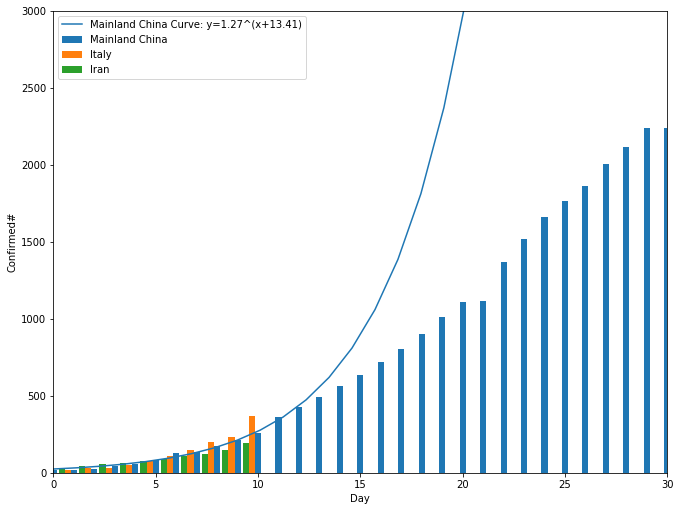

In [8]:
xpoints = np.linspace(0, 55)

# _data = confirmed_sum_jpn
_data = deaths_sum_mc[:13]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Mainland China Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.bar([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, width=0.3, label="Mainland China")

_data = deaths_sum_it
plt.bar([_-0.3-36 for _ in range(len(_data))], _data, width=0.3, label="Italy")
_data = deaths_sum_ir
plt.bar([_-0.6-36 for _ in range(len(_data))], _data, width=0.3, label="Iran")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 3000)
# plt.suptitle("Japan")
# plt.savefig("jpn.png")

(0, 10000)

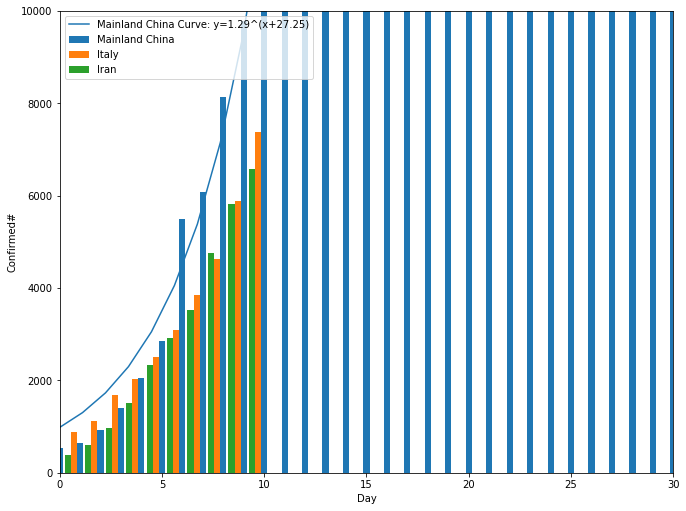

In [35]:
xpoints = np.linspace(0, 55)

# _data = confirmed_sum_jpn
_data = confirmed_sum_mc[:13]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Mainland China Curve: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.bar([_ for _ in range(len(confirmed_sum_mc))], confirmed_sum_mc, width=0.3, label="Mainland China")

_data = confirmed_sum_it
plt.bar([_-0.3-36 for _ in range(len(_data))], _data, width=0.3, label="Italy")
_data = confirmed_sum_ir
plt.bar([_-0.6-36 for _ in range(len(_data))], _data, width=0.3, label="Iran")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.xlim(0, 30)
plt.ylim(0, 10000)
# plt.suptitle("Japan")
# plt.savefig("jpn.png")

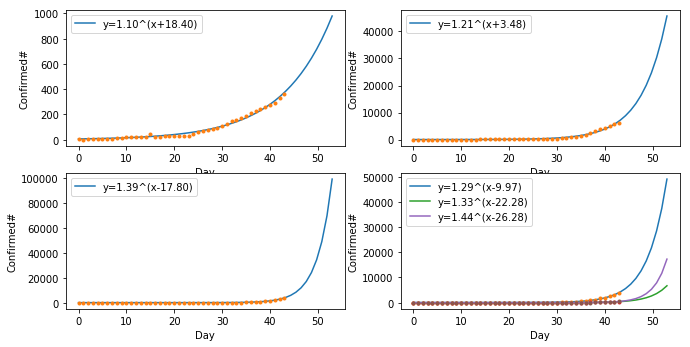

In [12]:
xpoints = np.linspace(0, 53)
plt.figure(figsize=(11, 8.5))

_data = confirmed_sum_jpn
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(321)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
# plt.suptitle("Japan")

_data = confirmed_sum_kr
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(322)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_ir
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(323)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_it
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(324)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_fr
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(325)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

_data = confirmed_sum_ger
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.subplot(326)
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
# plt.suptitle("Japan")
# plt.savefig("jpn.png")

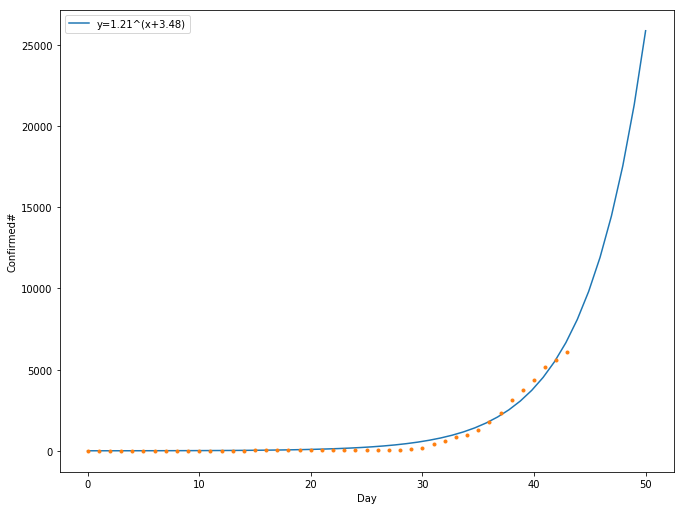

In [91]:
xpoints = np.linspace(0, 50)

_data = confirmed_sum_kr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

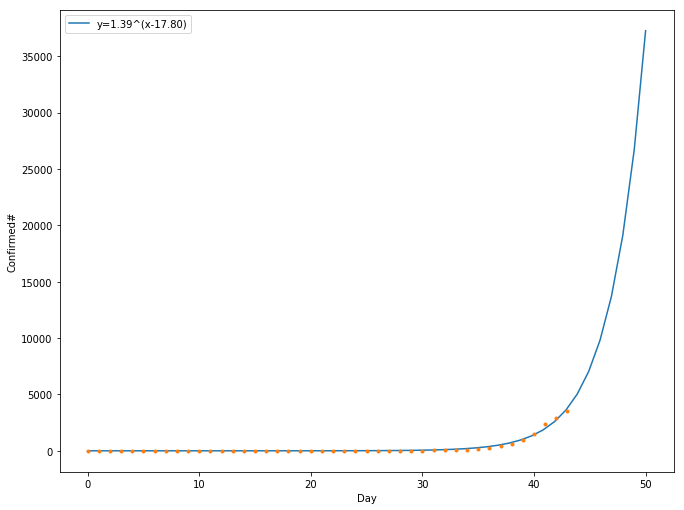

In [101]:
xpoints = np.linspace(0, 50)

_data = confirmed_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()

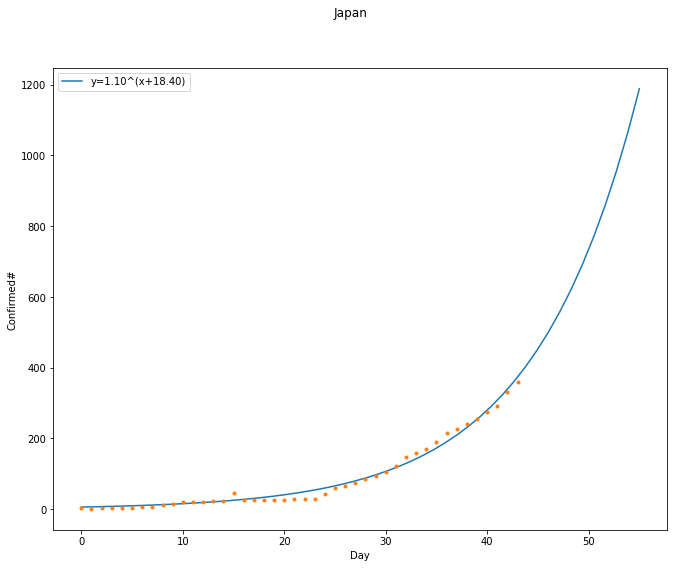

In [154]:
xpoints = np.linspace(0, 55)

_data = confirmed_sum_jpn

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Japan")
plt.savefig("jpn.png")

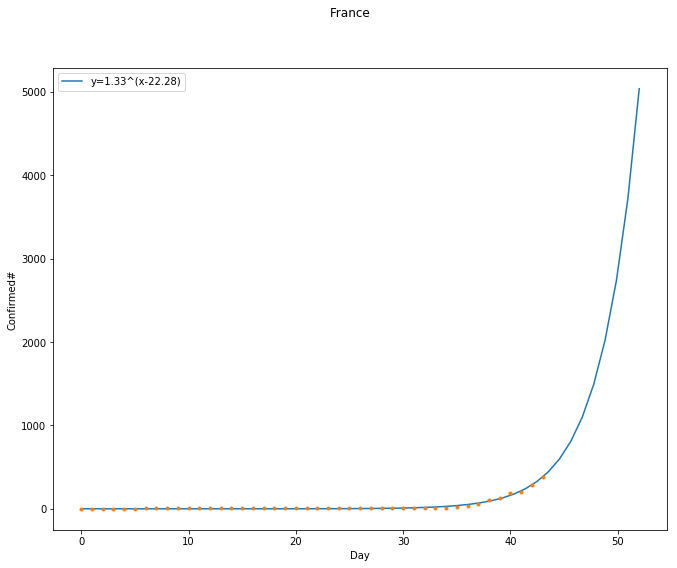

In [166]:
xpoints = np.linspace(0, 52)

_data = confirmed_sum_fr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("France")
plt.savefig("fr.png")

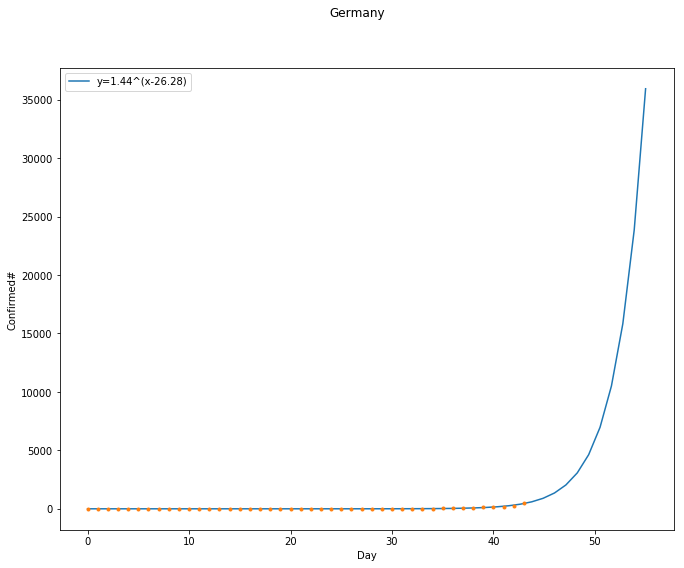

In [165]:
xpoints = np.linspace(0, 55)

_data = confirmed_sum_ger

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Germany")
plt.savefig("ger.png")

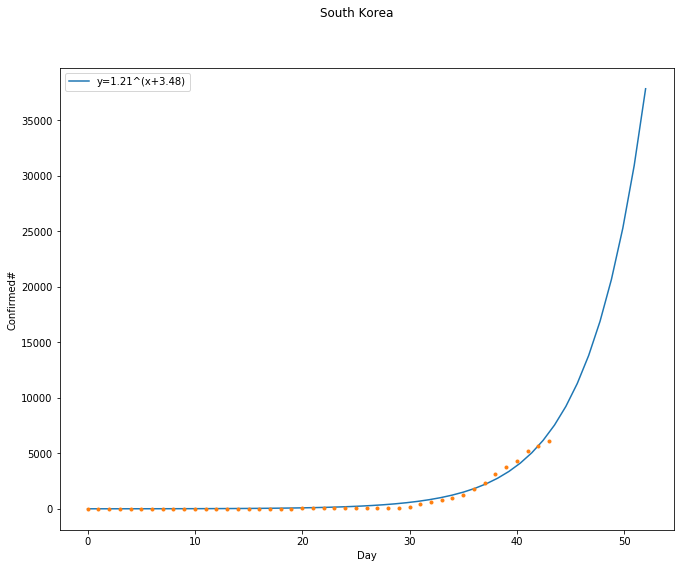

In [167]:
xpoints = np.linspace(0, 52)

_data = confirmed_sum_kr

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("South Korea")
plt.savefig("kr.png")

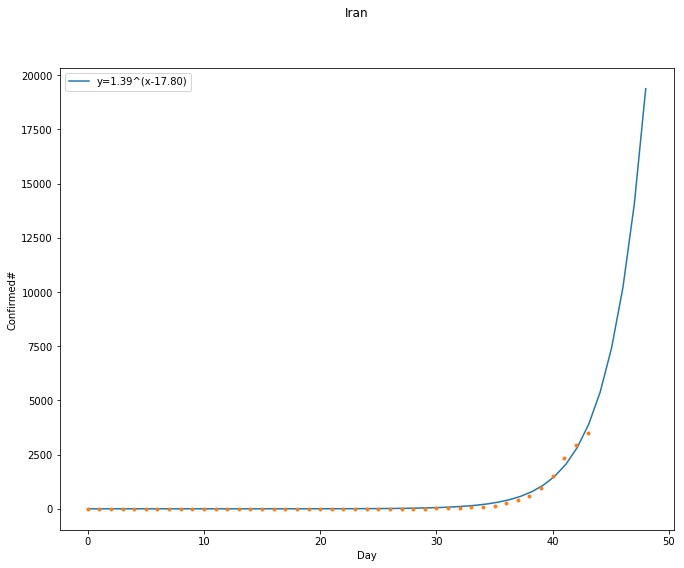

In [164]:
xpoints = np.linspace(0, 48)

_data = confirmed_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Iran")
plt.savefig("ir.png")

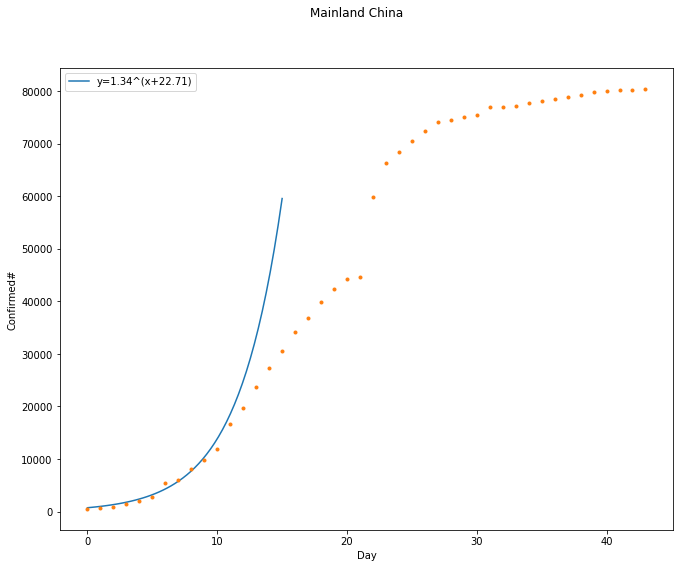

In [135]:
xpoints = np.linspace(0, 15)

_data = confirmed_sum_mc[0:10]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_mc))], confirmed_sum_mc, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Mainland China")
plt.savefig("mainland china.png")

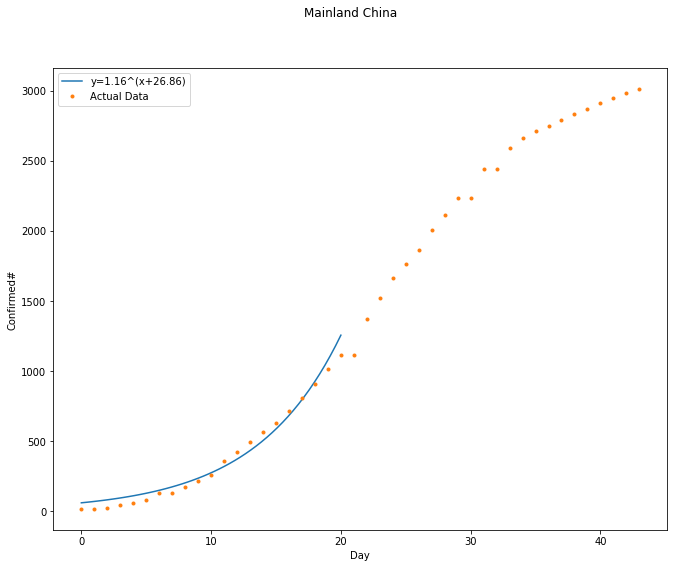

In [132]:
xpoints = np.linspace(0, 20)

_data = deaths_sum_mc[0:20]

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(deaths_sum_mc))], deaths_sum_mc, ".", label="Actual Data")
plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Mainland China")
plt.savefig("mainland china.png")

Text(0.5, 0.98, 'Iran vs Italy')

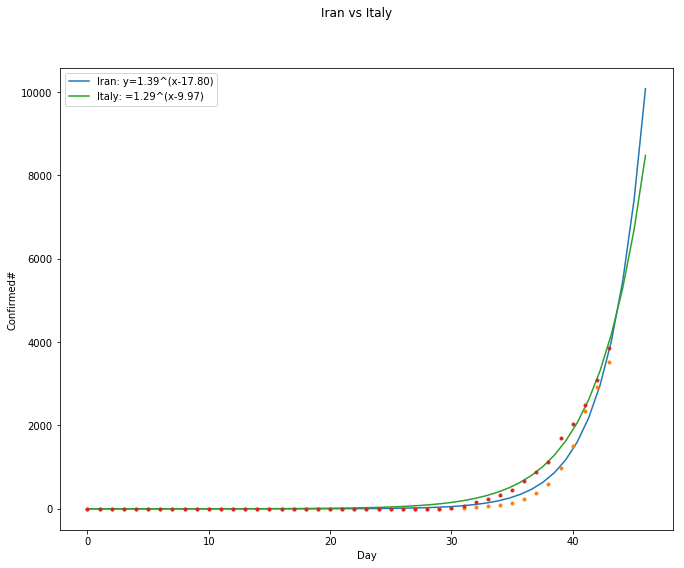

In [163]:
xpoints = np.linspace(0, 46)

_data = confirmed_sum_ir

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Iran: y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")

_data = confirmed_sum_it

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(_data))], np.array(_data))
# plt.figure(figsize=(11, 8.5))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="Italy: ={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(_data))], _data, ".")

plt.xlabel("Day")
plt.ylabel("Confirmed#")
plt.legend()
plt.suptitle("Iran vs Italy")
# plt.savefig("ir.png")

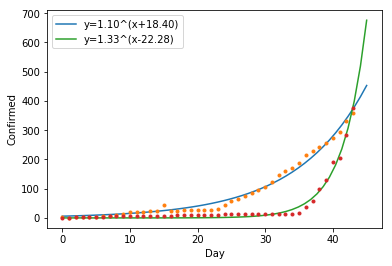

In [83]:
xpoints = np.linspace(0, 45)

param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(confirmed_sum_jpn))], np.array(confirmed_sum_jpn))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_jpn))], confirmed_sum_jpn, ".")
param, cov = curve_fit(nonlinear_fit, [_ for _ in range(len(confirmed_sum_fr))], np.array(confirmed_sum_fr))
plt.plot(xpoints, nonlinear_fit(xpoints, param[0], param[1]), 
         label="y={0:.2f}^(x{1:+.2f})".format(param[0], -param[1]))
plt.plot([_ for _ in range(len(confirmed_sum_fr))], confirmed_sum_fr, ".")
plt.xlabel("Day")
plt.ylabel("Confirmed")
plt.legend()

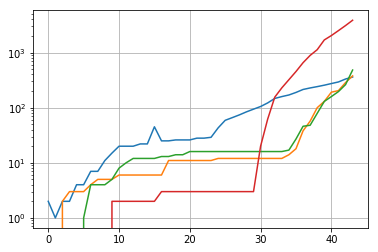

In [57]:
plt.plot(np.array(confirmed_sum_jpn, dtype=float))
plt.plot(np.array(confirmed_sum_fr, dtype=float))
plt.plot(np.array(confirmed_sum_ger, dtype=float))
plt.plot(np.array(confirmed_sum_it, dtype=float))
plt.yscale("log")
plt.grid()

In [161]:
confirmed[confirmed["Province/State"]=="King County, WA"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
35,"King County, WA",US,47.6062,-122.3321,1,1,1,1,1,1,...,1,1,1,6,9,14,21,31,51,58.0


In [162]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
0,Anhui,Mainland China,31.82570,117.2264,1,9,15,39,60,70,...,989,989,990,990,990,990,990,990,990,990.0
1,Beijing,Mainland China,40.18240,116.4142,14,22,36,41,68,80,...,400,410,410,411,413,414,414,418,418,422.0
2,Chongqing,Mainland China,30.05720,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576.0
3,Fujian,Mainland China,26.07890,117.9874,1,5,10,18,35,59,...,294,296,296,296,296,296,296,296,296,296.0
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,102,119.0
5,Guangdong,Mainland China,23.34170,113.4244,26,32,53,78,111,151,...,1347,1347,1348,1349,1349,1350,1350,1350,1351,1352.0
6,Guangxi,Mainland China,23.82980,108.7881,2,5,23,23,36,46,...,252,252,252,252,252,252,252,252,252,252.0
7,Guizhou,Mainland China,26.81540,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146.0
8,Hainan,Mainland China,19.19590,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168.0
9,Hebei,Mainland China,38.04280,114.5149,1,1,2,8,13,18,...,312,317,318,318,318,318,318,318,318,318.0
